# Comparing VI redshifts with a truth table

This notebook compares VI redshifts and flags to the real redshifts from the sims. It identifies some problematic cases and plots them on a prospect window.

This notebook is set up to work on the svdc2019c sims, not data.

In [1]:
import os, sys
import numpy as np
from astropy.io import fits
from astropy.table import Table, join
import pandas as pd

import desispec
# library location will change ..
sys.path.append("/global/homes/r/rtojeiro/prospect/prospect/py")
from prospect import utils_specviewer,plotframes
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%set_env DESI_SPECTRO_REDUX=/global/project/projectdirs/desi/datachallenge/svdc-summer2019/svdc2019c/spectro/redux
%set_env SPECPROD=v1
reduxdir = desispec.io.specprod_root()

env: DESI_SPECTRO_REDUX=/global/project/projectdirs/desi/datachallenge/svdc-summer2019/svdc2019c/spectro/redux
env: SPECPROD=v1


## Read in 

In [3]:
df = pd.read_csv(os.environ['HOME']+'/SV/vi_merged.csv') #All VI files you want to compare, merged into one (if more than one)
vi = Table.from_pandas(df)

In [4]:
truth = Table.read('/global/project/projectdirs/desi/datachallenge/svdc-summer2019/svdc2019c/targets/truth.fits', hdu=1)

In [5]:
targets = Table.read('/global/project/projectdirs/desi/datachallenge/svdc-summer2019/svdc2019c/targets/targets.fits', hdu=1)

In [6]:
targets.keys()

['RELEASE',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'MORPHTYPE',
 'RA',
 'DEC',
 'RA_IVAR',
 'DEC_IVAR',
 'DCHISQ',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_W3',
 'FLUX_W4',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_W3',
 'FLUX_IVAR_W4',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'MW_TRANSMISSION_W3',
 'MW_TRANSMISSION_W4',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'FRACFLUX_G',
 'FRACFLUX_R',
 'FRACFLUX_Z',
 'FRACMASKED_G',
 'FRACMASKED_R',
 'FRACMASKED_Z',
 'FRACIN_G',
 'FRACIN_R',
 'FRACIN_Z',
 'ALLMASK_G',
 'ALLMASK_R',
 'ALLMASK_Z',
 'WISEMASK_W1',
 'WISEMASK_W2',
 'PSFDEPTH_G',
 'PSFDEPTH_R',
 'PSFDEPTH_Z',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'FRACDEV',
 'FRACDEV_IVAR',
 'SHAPEDEV_R',
 'SHAPEDEV_R_IVAR',
 'SHAPEDEV_E1',
 'SHAPEDEV_E1_IVAR',
 'SHAPEDEV_E2',
 'SHAPEDEV_E2_IVAR',
 'SHAPEEXP_R',
 'SHAPEEXP_R_IVAR',
 'SHAPEEXP_E1',
 'SHA

Join truth tables and master VI file

In [7]:
truth.rename_column('TARGETID', 'TargetID') 
targets.rename_column('TARGETID', 'TargetID')

In [8]:
vi = join(vi, truth, join_type='left', keys='TargetID')

Add pixel number from the targets table

In [9]:
vi = join(vi, targets, join_type='left', keys='TargetID')

In [10]:
vi

TargetID,ExpID,Spec version,Redrock version,Redrock spectype,Redrock z,VI scanner,VI class,VI issue,VI z,VI spectype,VI comment,MOCKID,TRUEZ,TRUESPECTYPE,TEMPLATETYPE,TEMPLATESUBTYPE,TEMPLATEID,SEED,MAG,MAGFILTER,FLUX_G_1,FLUX_R_1,FLUX_Z_1,FLUX_W1_1,FLUX_W2_1,FLUX_W3_1,FLUX_W4_1,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,RA,DEC,RA_IVAR,DEC_IVAR,DCHISQ [5],FLUX_G_2,FLUX_R_2,FLUX_Z_2,FLUX_W1_2,FLUX_W2_2,FLUX_W3_2,FLUX_W4_2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_R_IVAR,SHAPEDEV_E1,SHAPEDEV_E1_IVAR,SHAPEDEV_E2,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_R_IVAR,SHAPEEXP_E1,SHAPEEXP_E1_IVAR,SHAPEEXP_E2,SHAPEEXP_E2_IVAR,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_CAT,REF_ID,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,MASKBITS,EBV,PHOTSYS,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,PRIORITY_INIT,SUBPRIORITY,NUMOBS_INIT,HPXPIXEL
int64,int64,int64,int64,str6,float64,str18,int64,str2,str6,str6,str62,int64,float32,str10,str10,str10,int32,int64,float32,str15,float32,float32,float32,float32,float32,float32,float32,int16,int32,str8,int32,str4,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str2,int64,float32,float32,float32,float32,float32,float32,float32,bool,float32,float32,float32,float32,float32,float32,int16,float32,str1,int64,int64,int64,int64,float64,int64,int64
288230400122160605,-1,0,0,GALAXY,0.7290000000000001,ace,3,--,--,GALAXY,--,56030228,0.72906697,GALAXY,ELG,,2270,1502385525,23.174227,BASS-r,0.46954402,0.5374144,0.9667223,2.167249,1.2527223,0.0,0.0,9999,545670,1549p405,1501,REX,154.87997436523438,40.51198959350586,100000000.0,100000000.0,0.0 .. 400.0,0.4193527,0.5163246,0.8746863,2.2034504,-0.98780555,0.0,0.0,1438.5999,329.56418,62.79716,0.8193019,0.32405868,0.0,0.0,0.9658959,0.9768971,0.98690426,0.99801546,0.9987808,0.9997398,0.9999018,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,52.480747,7.7268057,1.8706821,57.543995,13.182568,2.5118864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5456617,295.00293,0.0,0.0,0.0,0.0,0.1698318,0.21904717,0.39067033,0.1698318,0.21904717,0.39067033,,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,1.0,0.0,1.0,0.0,1.0,0,0.011721909,N,258,0,0,3000,0.8343776755190071,1,5715
288230400122160671,-1,0,0,GALAXY,1.4,ace,2,--,--,GALAXY,--,56050083,1.3989427,GALAXY,ELG,,4874,1836233527,23.245464,BASS-r,0.40898344,0.50328535,0.90144837,1.7091265,1.6568614,0.0,0.0,9999,545670,1549p405,1567,REX,154.9272003173828,40.554317474365234,100000000.0,100000000.0,0.0 .. 400.0,0.37600368,0.5086102,0.9325291,2.1631093,1.1054364,0.0,0.0,1438.5999,329.56418,62.79716,0.8196965,0.32421017,0.0,0.0,0.9674238,0.9779378,0.98749703,0.99810576,0.9988363,0.9997517,0.99990624,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0,0,52.480747,7.7268057,1.8706821,57.543995,13.182568,2.5118864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.45427233,300

## Diagnostic plots

Text(0,0.5,'TRUEZ')

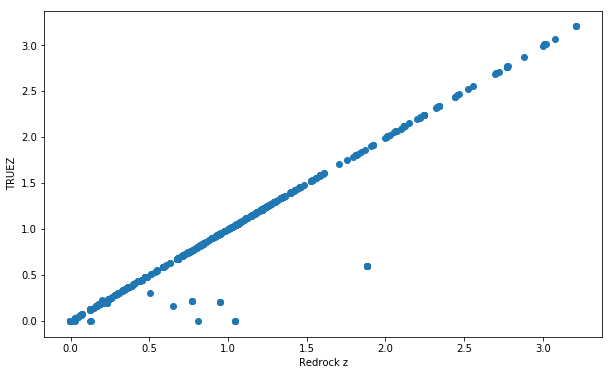

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(vi['Redrock z'], vi['TRUEZ'])
plt.xlabel('Redrock z')
plt.ylabel('TRUEZ')

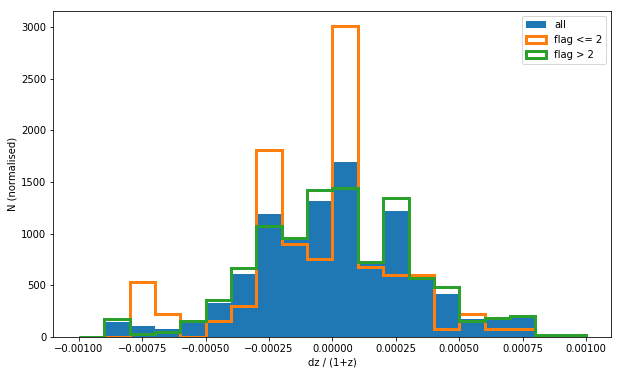

In [12]:
dz = (vi['Redrock z'] - vi['TRUEZ']) / (1 + vi['TRUEZ'])
plt.figure(figsize=(10,6))
x = plt.hist(dz, bins=20, range=(-1e-3, 1e-3), density=True, label='all')
plt.xlabel('dz / (1+z)')
plt.ylabel('N (normalised)')

x = plt.hist(dz[vi['VI class'] <=2], bins=20, range=(-1e-3, 1e-3), histtype='step', \
             density=True, label='flag <= 2', lw=3)
x = plt.hist(dz[vi['VI class'] > 2], bins=20, range=(-1e-3, 1e-3), histtype='step', \
             density=True, label='flag > 2', lw=3)
plt.legend()


In [13]:
bad_z = np.abs(dz) > 1e-2
print('number of bad redshifts: ', len(vi[bad_z]))

number of bad redshifts:  27


In [14]:
vi[bad_z]['TargetID', 'VI class', 'Redrock z', 'TRUEZ', 'TRUESPECTYPE' , 'TEMPLATETYPE']

TargetID,VI class,Redrock z,TRUEZ,TRUESPECTYPE,TEMPLATETYPE
int64,int64,float64,float32,str10,str10
288230400893917232,2,0.126,0.001321078,STAR,STAR
288230400893917237,1,0.131,-0.0008388258,STAR,STAR
288230420678448773,2,0.952,0.20190482,QSO,QSO
288230420678448773,3,0.952,0.20190482,QSO,QSO
288230420678448773,1,0.952,0.20190482,QSO,QSO
288230420678449182,2,1.042,0.00041374995,STAR,STAR
288230420678449182,4,1.042,0.00041374995,STAR,STAR
288230420678449182,1,1.042,0.00041374995,STAR,STAR
288230484385732548,2,1.881,0.59534544,QSO,QSO


Text(0.5,0,'VI flag')

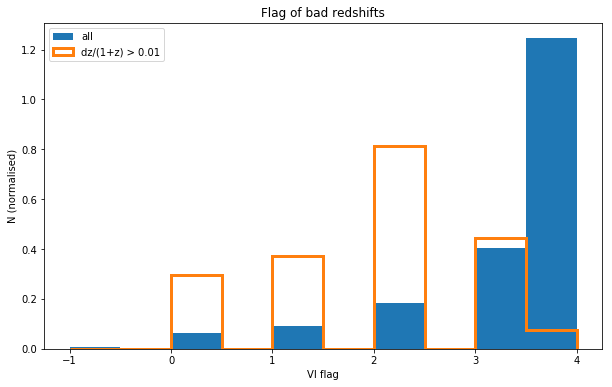

In [15]:
plt.figure(figsize=(10,6))
x = plt.hist(vi['VI class'], density=True, stacked=True, range=(-1,4), label='all')
x = plt.hist(vi[bad_z]['VI class'], density=True, stacked=True, range=(-1,4), \
             histtype='step', lw=3, label='dz/(1+z) > 0.01')
plt.legend()
plt.title('Flag of bad redshifts')
plt.ylabel('N (normalised)')
plt.xlabel('VI flag')

## Look at objects with poor flag but correct redshift

This is just an example of a set of objects to inspect more closely - change as needed. E.g., one could also look at the objects for which redrock got the wrong redshift, etc.

In [16]:
#make a dataframe with fewer columns
vi_df = vi['TargetID', 'Redrock spectype', 'Redrock z', 
           'VI scanner','VI class','VI issue','VI z','VI spectype','VI comment',
          'TRUEZ','TRUESPECTYPE','TEMPLATETYPE','HPXPIXEL'].to_pandas()

In [17]:
#define problematic classifications (change to whatever you'd like to investigate)
prob = (bad_z==False) & (vi_df['VI class'] <2) 

In [18]:
vi_df[prob]

,TargetID,Redrock spectype,Redrock z,VI scanner,VI class,VI issue,VI z,VI spectype,VI comment,TRUEZ,TRUESPECTYPE,TEMPLATETYPE,HPXPIXEL
39,288230403565684169,GALAXY,1.249,llg,-1,--,--,--,OII Line ok. MgII ?,1.248145,GALAXY,ELG,6536
52,288230403565684424,GALAXY,1.230,llg,1,--,--,--,No obvious line,1.228866,GALAXY,ELG,6536
54,288230403565684424,GALAXY,1.230,SYB,1,--,--,--,"Hard to separate lines in model"","" data"","" and...",1.228866,GALAXY,ELG,6536
60,288230403565684638,GALAXY,1.449,ea,1,R,0.84,--,--,1.448894,GALAXY,ELG,6536
67,288230403565684862,GALAXY,0.776,llg,-1,--,--,--,low S/N,0.776305,GALAXY,ELG,6536
70,288230403565684932,GALAXY,1.525,ea,1,--,--,--,--,1.525299,GALAXY,ELG,6536
82,288230403565685470,GALAXY,1.400,souza,1,C,--,QSO,--,1.400409,GALAXY,ELG,6536
85,288230403565685552,GALAXY,1.217,corentinravoux,1,--,--,--,--,1.217632,GALAXY,ELG,6536
90,288230403565685552,GALAXY,1.217,souza,1,--,--,--,--,1.217632,GALAXY,ELG,6536
91,288230403565685552,GALAXY,1.217,Ting-Wen Lan,0,--,--,--,--,1.217632,GALAXY,ELG,6536


In [20]:
prob_targetiD = vi_df[prob]['TargetID']

### Spot checks on a few objects, by targetID

In [21]:
def show_problem_VI_single(vi_insp, targetID, plot_with_Prospect=False):
    pixel_number=vi_insp['HPXPIXEL'][vi_insp['TargetID']==targetID].iloc[0]
    display(vi_insp[vi_insp.TargetID==targetID])
    
    #find the files for this pixel, and read the spectra and the zbest from redrock
    specfile=desispec.io.findfile('spectra', groupname=str(pixel_number))
    zbfile=desispec.io.findfile('zbest', groupname=pixel_number)
    spectra = desispec.io.read_spectra(specfile)
    zbest = Table.read(zbfile, 'ZBEST')   
 
    #for target in our_targets: display_problem_objects(vi_insp_grp, pixel_number, target)
    sp_single_exp = spectra.select(targets=[targetID])
    sp_coadd = utils_specviewer.coadd_targets(sp_single_exp)
    if plot_with_Prospect: plotframes.plotspectra(sp_single_exp, zcatalog=zbest, notebook=True,with_vi_widgets=False)
    return sp_single_exp

In [ ]:
show_problem_VI_single(vi_df, prob_targetID.iloc[10], plot_with_Prospect=True)

In [23]:
show_problem_VI_single(vi_df, 288230485253947741, plot_with_Prospect=True)

,TargetID,Redrock spectype,Redrock z,VI scanner,VI class,VI issue,VI z,VI spectype,VI comment,TRUEZ,TRUESPECTYPE,TEMPLATETYPE,HPXPIXEL
716,288230485253947741,GALAXY,0.367,HXU,0,--,--,--,--,0.366681,GALAXY,BGS,26012
717,288230485253947741,GALAXY,0.367,Nath,1,--,--,--,--,0.366681,GALAXY,BGS,26012
718,288230485253947741,GALAXY,0.367,ea,1,--,--,--,could be a star?,0.366681,GALAXY,BGS,26012


Loading BokehJS ...